# Logistic Regression

### Import necessary modules

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Load data in

In [2]:
data = pd.read_csv('./data/exam_passing_rate.csv',
                   names=['exam1', 'exam2', 'passed'])
data.insert(0, 'ones', 1)

### Visualise data

Text(0.5,1,'Exam pass/fail scores')

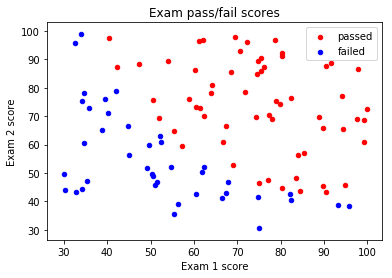

In [3]:
passed = data[data['passed'] == 1]
failed = data[data['passed'] == 0]

ax = passed.plot('exam1', 'exam2', kind='scatter', label='passed', c='red')
failed.plot('exam1', 'exam2', kind='scatter', label='failed', c='blue', ax=ax)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Exam pass/fail scores')

## Logistic Regression Using Gradient Descent

In [4]:
x_matrix = data[['ones', 'exam1', 'exam2']].values
y_vector = data[['passed']].values

In [5]:
def sigmoid(value):
    return 1/(1 + np.exp(-value))

In [6]:
def hypothesis(predictors, weights):
    return sigmoid(np.dot(weights.T, predictors))

In [7]:
def error(predictors, weights, targets):
    return sigmoid(np.dot(predictors, weights)) - targets

In [8]:
def cost(predictors, weights, targets):
    num_examples = len(targets)
    hypothesis_matrix = sigmoid(np.dot(predictors, weights))
    true_cost = np.dot(targets.T, np.log(hypothesis_matrix))
    false_cost = np.dot((1 - targets).T, np.log(1 - hypothesis_matrix))
    return (-1 / num_examples) * (true_cost + false_cost)

In [9]:
def update_weights(weights, predictors, targets, learning_rate):
    temp_weights = np.zeros(len(weights))
    errors = error(predictors, weights, targets)
    for index in range(len(weights)):
        partial_dif = np.sum(errors * predictors[:, index])
        temp_weights[index] = weights[index] - learning_rate * partial_dif
    return temp_weights

In [10]:
def grad_desc(weights, predictors, targets, learning_rate, iterations):
    costs = np.zeros(iterations)
    for iteration in range(iterations):
        costs[iteration] = cost(predictors, weights, targets)
        weights = update_weights(weights, predictors, targets, learning_rate)
    return weights, costs

In [11]:
weights = np.zeros(3)
learning_rate = 0.000000003
iterations = 1000

In [12]:
weights, costs = grad_desc(weights, x_matrix, y_vector, learning_rate, iterations)

Initial cost: 0.6931471805599453
Final cost: 0.6440459681174315
Cost change: -0.04910121244251375


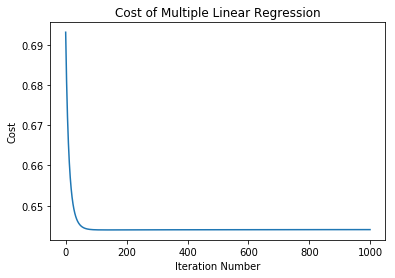

In [13]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(list(range(iterations)), costs)
ax.set_title('Cost of Multiple Linear Regression')
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Cost')
print(f'Initial cost: {costs[0]}')
print(f'Final cost: {costs[-1]}')
print(f'Cost change: {costs[-1] - costs[0]}')

In [14]:
weights

array([0.00015636, 0.00282155, 0.00309564])

In [15]:
hypothesis(np.array([1, 0, 0]), weights)

0.5000390907086854